In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
'''
获取国内股票数据的方式是：“股票代码”+“对应股市”（港股为.hk，A股为.ss）
例如腾讯是港股是：0700.hk
'''
#字典：6家公司的股票
gafataDict={'谷歌':'GOOG','亚马逊':'AMZN','Facebook':'FB',
            '苹果':'AAPL','阿里巴巴':'BABA','腾讯':'0700.hk'}

In [3]:
start = datetime(2018, 1, 1)
end = datetime(2018, 4, 28)
googleDf = pdr.DataReader(gafataDict['谷歌'], 'morningstar', start, end)
amazonDf = pdr.DataReader(gafataDict['亚马逊'], 'morningstar', start, end)
fbDf = pdr.DataReader(gafataDict['Facebook'], 'morningstar', start, end)
appleDf = pdr.DataReader(gafataDict['苹果'], 'morningstar', start, end)
aliDf = pdr.DataReader(gafataDict['阿里巴巴'], 'morningstar', start, end)

In [4]:
print(googleDf.head()); print()
print(amazonDf.head()); print()
print(fbDf.head()); print()
print(appleDf.head()); print()
print(aliDf.head())

                     Close       High        Low     Open   Volume
Symbol Date                                                       
GOOG   2018-01-01  1046.40  1046.4000  1046.4000  1046.40        0
       2018-01-02  1065.00  1066.9400  1045.2300  1048.34  1237564
       2018-01-03  1082.48  1086.2900  1063.2100  1064.31  1430170
       2018-01-04  1086.40  1093.5699  1084.0017  1088.00  1004605
       2018-01-05  1102.23  1104.2500  1092.0000  1094.00  1279123

                     Close       High      Low     Open   Volume
Symbol Date                                                     
AMZN   2018-01-01  1169.47  1169.4700  1169.47  1169.47        0
       2018-01-02  1189.01  1190.0000  1170.51  1172.00  2694494
       2018-01-03  1204.20  1205.4900  1188.30  1188.30  3108793
       2018-01-04  1209.59  1215.8699  1204.66  1205.00  3022089
       2018-01-05  1229.14  1229.1400  1210.00  1217.51  3544743

                    Close    High       Low    Open    Volume
Symbol Date 

In [5]:
google = googleDf.reset_index()
amazon = amazonDf.reset_index()
fb = fbDf.reset_index()
apple = appleDf.reset_index()
ali = aliDf.reset_index()

In [6]:
close_collect_df = pd.concat([google['Date'], google['Close'], amazon['Close'], fb['Close'], apple['Close'], ali['Close']], axis=1)
close_collect_df.columns = ['Date', 'GOOGLE', 'AMAZON', 'FB', 'APPLE', 'Ali']
close_collect_df.set_index('Date', inplace=True)
close_collect_df.head()

,GOOGLE,AMAZON,FB,APPLE,Ali
Date,,,,,
2018-01-01,1046.40,1169.47,176.46,169.23,172.43
2018-01-02,1065.00,1189.01,181.42,172.26,183.65
2018-01-03,1082.48,1204.20,184.67,172.23,184.00
2018-01-04,1086.40,1209.59,184.33,173.03,185.71
2018-01-05,1102.23,1229.14,186.85,175.00,190.70


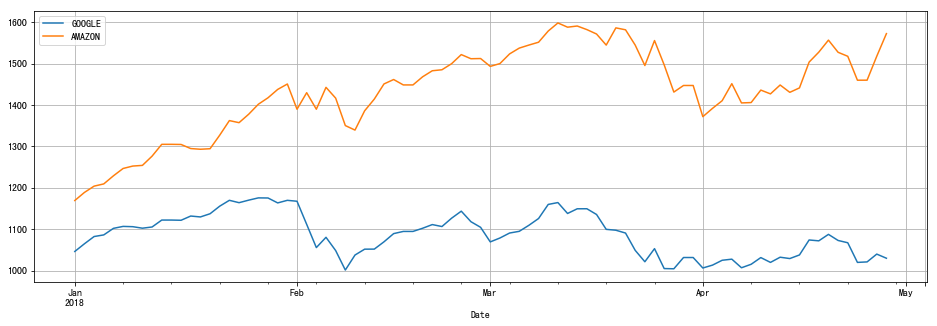

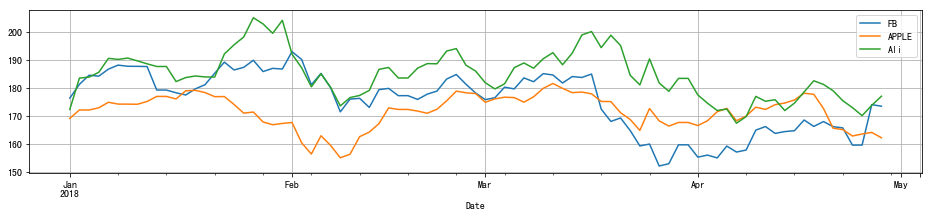

In [7]:
close_collect_df[['GOOGLE', 'AMAZON']].plot(figsize=(16, 5), grid=True, use_index=True)
close_collect_df[['FB', 'APPLE', 'Ali']].plot(figsize=(16, 3), grid=True, use_index=True)
# 因Google和Amazon股价较接近，FB、Apple和阿里股价较接近，因此分为两个图更加清晰

>从折线图中可以看出，Amazon的股价呈上涨态势，而Google基本保持平稳。
>
>FB，Apple，阿里三家公司的股票走势几乎吻合，呈现交替前进状态。

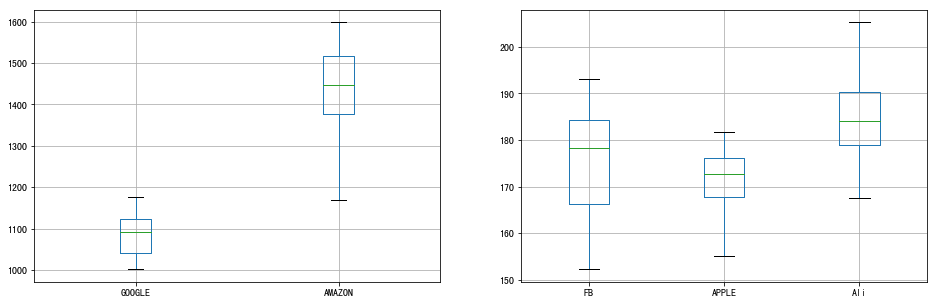

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
close_collect_df[['GOOGLE', 'AMAZON']].plot(ax=axes[0], kind='box', grid=True)
close_collect_df[['FB', 'APPLE', 'Ali']].plot(ax=axes[1], kind='box', grid=True)

> 箱线图可以更明确的反映出各支股票的平均股价及波动范围.
>
> Amazon比Google均价高，波动大。
>
> FB，Apple，阿里三家公司中，阿里平均股价最高，波动也较为平稳。

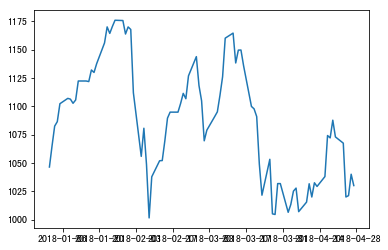

In [9]:
plt.plot(close_collect_df.index, close_collect_df['GOOGLE'])

In [10]:
type(close_collect_df['GOOGLE'])

pandas.core.series.Series